In [1]:
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv('titanic.csv')

<Axes: xlabel='Sex', ylabel='count'>

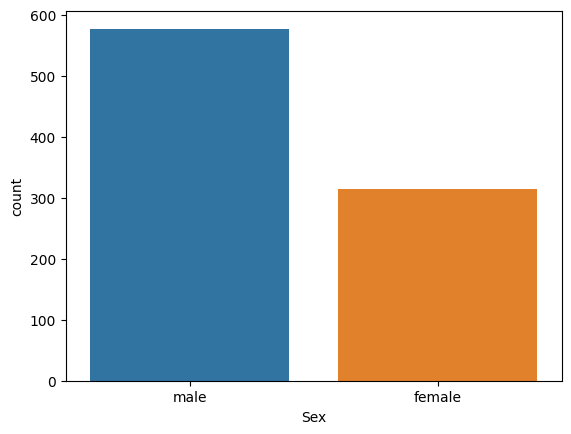

In [13]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='Survived', ylabel='count'>

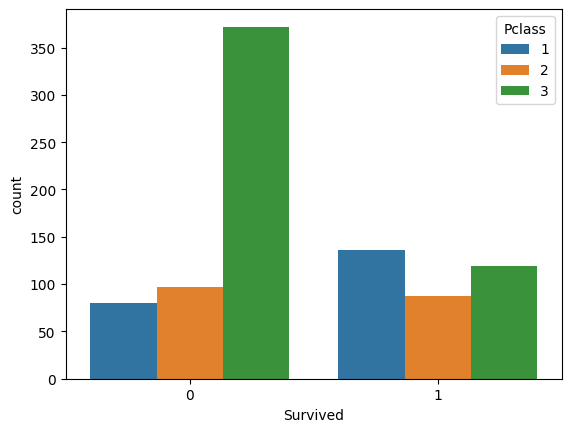

In [22]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])

<Axes: ylabel='Survived'>

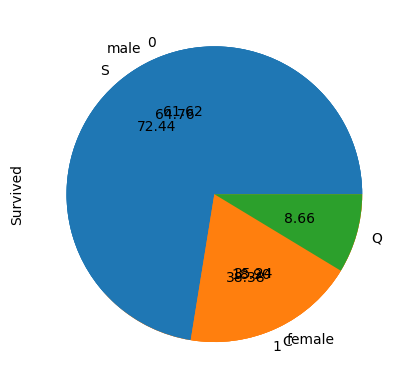

In [32]:
df['Sex'].value_counts().plot(kind='pie', autopct='%.2f', label='Survived')
# df['Survived'].value_counts().plot(kind='pie', autopct='%.2f', label='Survived')
# df['Embarked'].value_counts().plot(kind='pie', autopct='%.2f', label='Survived')